<a href="https://colab.research.google.com/github/niconaufal21/MachineLearning/blob/master/Nico_Naufal_Summit_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({
    'pendapatan_rata_rata': [5, 10, 20, 8, 4, 6, 12, 15],
    'penjualan_pizza':[27,46,73,40,30,28,46,59]
})

df

,pendapatan_rata_rata,penjualan_pizza
0,5,27
1,10,46
2,20,73
3,8,40
4,4,30
5,6,28
6,12,46
7,15,59


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Jika Variabel target adalah penjualan pizza

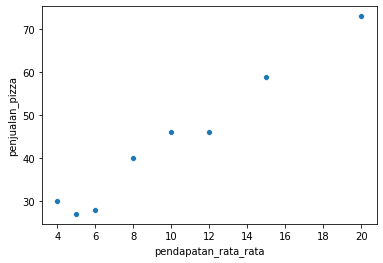

In [ ]:
sns.scatterplot(df.pendapatan_rata_rata, df.penjualan_pizza)
plt.show()

In [ ]:
df_backup = df.copy(deep=True)

In [ ]:
df_backup['x-x_mean'] = df_backup.pendapatan_rata_rata - np.mean(df_backup.pendapatan_rata_rata)
df_backup['y-y_mean'] = df.penjualan_pizza - np.mean(df.penjualan_pizza)

In [ ]:
df_backup

,pendapatan_rata_rata,penjualan_pizza,x-x_mean,y-y_mean
0,5,27,-5.0,-16.625
1,10,46,0.0,2.375
2,20,73,10.0,29.375
3,8,40,-2.0,-3.625
4,4,30,-6.0,-13.625
5,6,28,-4.0,-15.625
6,12,46,2.0,2.375
7,15,59,5.0,15.375


In [ ]:
df_backup['(x-x_mean) * (y-y_mean)'] = df_backup['x-x_mean']* df_backup['y-y_mean']
df_backup['(x-x_mean)^2'] = df_backup['x-x_mean']**2

In [ ]:
df_backup

,pendapatan_rata_rata,penjualan_pizza,x-x_mean,y-y_mean,(x-x_mean) * (y-y_mean),(x-x_mean)^2
0,5,27,-5.0,-16.625,83.125,25.0
1,10,46,0.0,2.375,0.000,0.0
2,20,73,10.0,29.375,293.750,100.0
3,8,40,-2.0,-3.625,7.250,4.0
4,4,30,-6.0,-13.625,81.750,36.0
5,6,28,-4.0,-15.625,62.500,16.0
6,12,46,2.0,2.375,4.750,4.0
7,15,59,5.0,15.375,76.875,25.0


In [ ]:
df_backup.columns

Index(['pendapatan_rata_rata', 'penjualan_pizza', 'x-x_mean', 'y-y_mean',
       '(x-x_mean) * (y-y_mean)', '(x-x_mean)^2'],
      dtype='object')

In [ ]:
b1 = np.sum(df_backup['(x-x_mean) * (y-y_mean)']) / np.sum(df_backup['(x-x_mean)^2'])
b1

2.9047619047619047

In [ ]:
b0 = np.mean(df_backup.penjualan_pizza) - b1*np.mean(df_backup.pendapatan_rata_rata)
b0

14.577380952380953

In [ ]:
def y(input_x):
    return b0 + b1*input_x

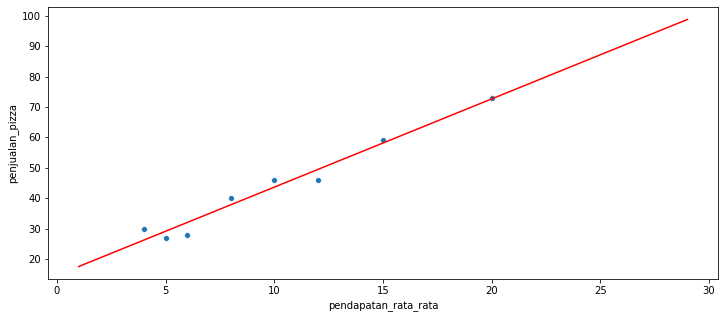

In [ ]:
plt.figure(figsize=(12,5))
X = np.arange(1, 30, 1)
sns.scatterplot(df.pendapatan_rata_rata, df.penjualan_pizza)
plt.plot(X, y(X), c='red')
plt.show()

In [ ]:
df['y_predict'] = y(df_backup.pendapatan_rata_rata)
df

,pendapatan_rata_rata,penjualan_pizza,y_predict
0,5,27,29.101190
1,10,46,43.625000
2,20,73,72.672619
3,8,40,37.815476
4,4,30,26.196429
5,6,28,32.005952
6,12,46,49.434524
7,15,59,58.148810


In [ ]:
df['SSE'] = (df.penjualan_pizza - df.y_predict)**2
df['SST'] = (df.penjualan_pizza - np.mean(df.penjualan_pizza))**2

In [ ]:
df

,pendapatan_rata_rata,penjualan_pizza,y_predict,SSE,SST
0,5,27,29.101190,4.415001,276.390625
1,10,46,43.625000,5.640625,5.640625
2,20,73,72.672619,0.107178,862.890625
3,8,40,37.815476,4.772144,13.140625
4,4,30,26.196429,14.467156,185.640625
5,6,28,32.005952,16.047654,244.140625
6,12,46,49.434524,11.795954,5.640625
7,15,59,58.148810,0.724525,236.390625


In [ ]:
r2 = 1 - (np.sum(df.SSE)/np.sum(df.SST))
r2

0.9683201103380077

In [ ]:
np.sum(df.SSE)

57.97023809523811

In [ ]:
np.sum(df.SST)

1829.875